In [4]:
import numpy as np
import os
import PIL
from PIL import Image
import PIL.Image
import tensorflow as tf
#import tensorflow_datasets as tfds
#import skimage
#from skimage.transform import resize
import cv2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout
from tensorflow.keras.layers import Activation, Dense

print(tf.__version__)

2.6.0


In [8]:
import pathlib

PATH = "C:\\Users\\HP\\Desktop\\Project\\num"
file_path = pathlib.Path(PATH)

train_dir = os.path.join(file_path, '.\\train')


BATCH_SIZE = 32
IMG_SIZE = (64, 64)

#train data set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

#valid data set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

class_names = train_ds.class_names
print(class_names)

Found 16500 files belonging to 11 classes.
Using 13200 files for training.
Found 16500 files belonging to 11 classes.
Using 3300 files for validation.
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'unknown']


In [9]:
from tensorflow.keras.models import load_model
model_num_adam = load_model('.\\data\model\\model_num_adam.hdf5')


In [10]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    ]
)

In [11]:
model_num_adam = tf.keras.Sequential([
    data_augmentation,
    model_num_adam])

In [12]:
model_num_adam.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/model_num_adam_agu.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

model_num_adam.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 참고: gpu사용
with tf.device('/device:GPU:0'):

    epochs=15
    history_num_agu = model_num_adam.fit(train_ds, epochs=epochs,
                   validation_steps=2,validation_data=(val_ds),
                   verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/15
413/413 [==============================] - 8s 15ms/step - loss: 1.9790 - accuracy: 0.3845 - val_loss: 0.9245 - val_accuracy: 0.6250
Epoch 2/15
413/413 [==============================] - 6s 15ms/step - loss: 1.3801 - accuracy: 0.5379 - val_loss: 1.2207 - val_accuracy: 0.5938
Epoch 3/15
413/413 [==============================] - 6s 15ms/step - loss: 1.1255 - accuracy: 0.6083 - val_loss: 0.6907 - val_accuracy: 0.7344
Epoch 4/15
413/413 [==============================] - 6s 15ms/step - loss: 0.9925 - accuracy: 0.6563 - val_loss: 0.6723 - val_accuracy: 0.8125
Epoch 5/15
413/413 [==============================] - 6s 15ms/step - loss: 0.8977 - accuracy: 0.6956 - val_loss: 0.8287 - val_accuracy: 0.7344
Epoch 6/15
413/413 [==============================] - 6s 15ms/step - loss: 0.8187 - accuracy: 0.7286 - val_loss: 0.9102 - val_accuracy: 0.7500
Epoch 7/15
413/413 [==============================] - 6s 15ms/step - loss: 0.7367 - accuracy: 0.7584 - val_loss: 0.5651 - val_accuracy: 0.8125

<Figure size 864x288 with 0 Axes>

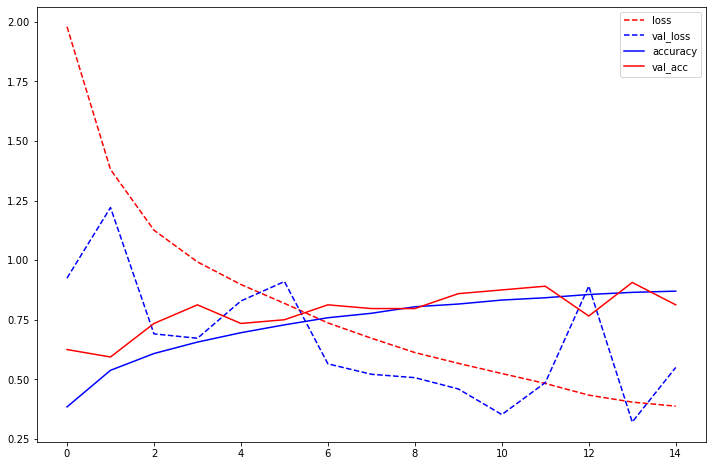

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.figure(figsize=(12,8))
plt.plot(history_num_agu.history['loss'],'--',c='red')
plt.plot(history_num_agu.history['val_loss'],'--',c='blue')
plt.plot(history_num_agu.history['accuracy'],c='blue')
plt.plot(history_num_agu.history['val_accuracy'],c='red')
plt.legend(['loss','val_loss', 'accuracy','val_acc'])
plt.show()

--------------------------벤치 사이즈 줄이고 에포크 올려서 다시 학습-----------------------

In [15]:
with tf.device('/device:GPU:0'):

    epochs=30
    history_num_agu = model_num_adam.fit(train_ds, epochs=epochs,
                   validation_steps=2,validation_data=(val_ds),
                   verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/30
413/413 [==============================] - 7s 15ms/step - loss: 0.3593 - accuracy: 0.8769 - val_loss: 0.1864 - val_accuracy: 0.9375
Epoch 2/30
413/413 [==============================] - 6s 15ms/step - loss: 0.3570 - accuracy: 0.8804 - val_loss: 0.1705 - val_accuracy: 0.9844
Epoch 3/30
413/413 [==============================] - 6s 16ms/step - loss: 0.3320 - accuracy: 0.8870 - val_loss: 0.5139 - val_accuracy: 0.8750
Epoch 4/30
413/413 [==============================] - 6s 15ms/step - loss: 0.3311 - accuracy: 0.8902 - val_loss: 0.3959 - val_accuracy: 0.8438
Epoch 5/30
413/413 [==============================] - 6s 16ms/step - loss: 0.3068 - accuracy: 0.8980 - val_loss: 0.2622 - val_accuracy: 0.9219
Epoch 6/30
413/413 [==============================] - 6s 16ms/step - loss: 0.3000 - accuracy: 0.9080 - val_loss: 0.3982 - val_accuracy: 0.8750
Epoch 7/30
413/413 [==============================] - 6s 16ms/step - loss: 0.2526 - accuracy: 0.9364 - val_loss: 0.2596 - val_accuracy: 0.9375

<Figure size 864x288 with 0 Axes>

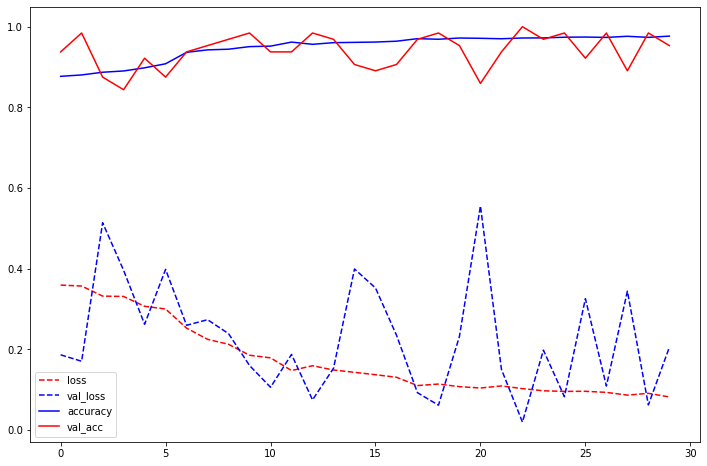

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.figure(figsize=(12,8))
plt.plot(history_num_agu.history['loss'],'--',c='red')
plt.plot(history_num_agu.history['val_loss'],'--',c='blue')
plt.plot(history_num_agu.history['accuracy'],c='blue')
plt.plot(history_num_agu.history['val_accuracy'],c='red')
plt.legend(['loss','val_loss', 'accuracy','val_acc'])
plt.show()

In [17]:
test_all_label=[]; test_all_image=[]
for test_img, test_label in val_ds:
    test_all_label.extend(test_label.numpy())
    test_all_image.extend(test_img.numpy())
np.shape(test_all_label), np.shape(test_all_image)

((3300,), (3300, 64, 64, 3))

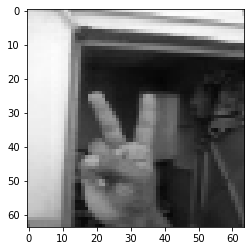

In [18]:
plt.imshow((test_all_image[2][:]).astype('uint8'))

In [19]:
model_num_adam.predict(test_all_image[0].reshape(1,64,64,3),test_all_label[0])

array([[9.95316982e-01, 7.55803660e-04, 3.30007984e-04, 8.79884901e-05,
        2.77131825e-04, 1.21005985e-04, 3.40965140e-04, 2.91242119e-04,
        2.10191181e-04, 1.25303501e-04, 2.14338768e-03]], dtype=float32)

In [20]:
from tqdm import tqdm
result=[]
with tf.device('/device:GPU:0'):
    for img in tqdm(test_all_image):
        softmax=model_num_adam.predict(img.reshape(1,64,64,3))
        result.append(np.argmax(softmax))

100%|██████████████████████████████████████████████████████████████████████████████| 3300/3300 [01:36<00:00, 34.29it/s]


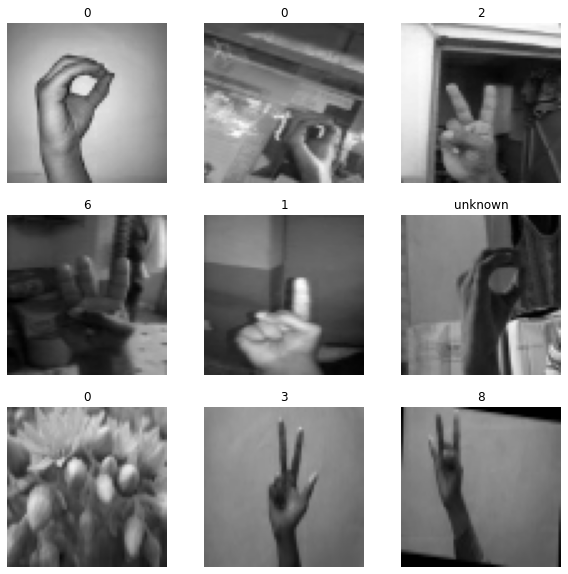

In [21]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(test_all_image[i].astype("uint8"))
  plt.title(class_names[result[i]])
  plt.axis("off")

In [147]:
model_num_adam.evaluate(val_ds)

104/104 [==============================] - 1s 11ms/step - loss: 0.2362 - accuracy: 0.9403


[0.2361779659986496, 0.9403030276298523]

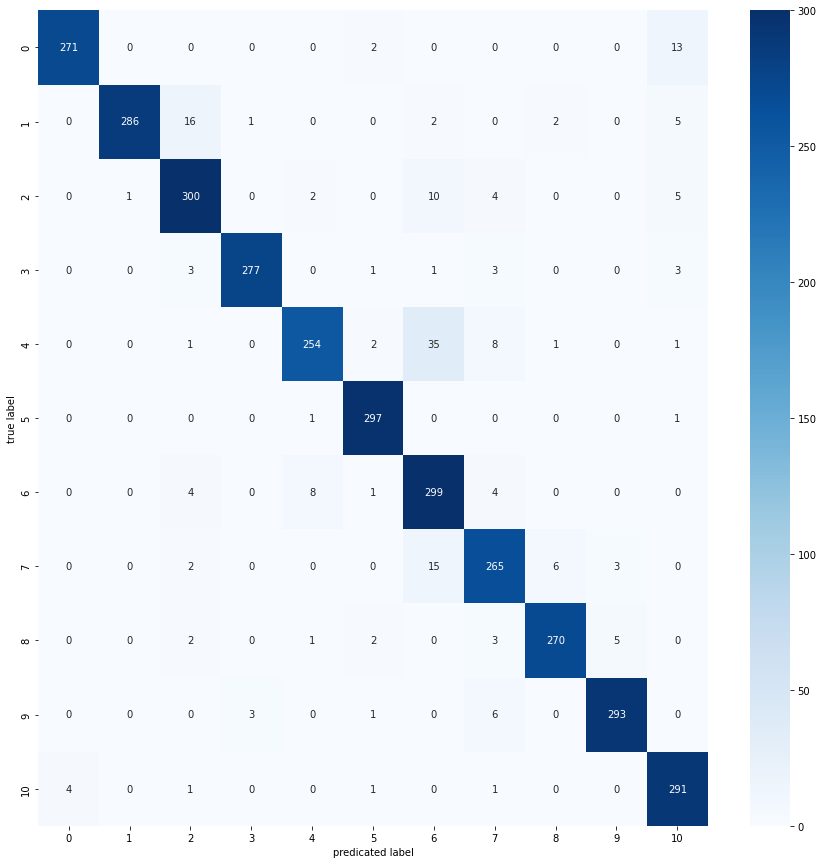

In [148]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


#혼돈행렬만들기
plt.figure(figsize=(15,15))
cm=confusion_matrix(test_all_label, result)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('predicated label')
plt.ylabel('true label')
plt.show()

In [190]:
tmp = glob.glob(".\\test\\0_0.jpg")
tmp_1 = tmp[0].split('\\')
tmp_2 = tmp_1[2].split('.')

tmp_3 = tmp_2[0].split('_')
tmp_3[0]

'0'

(64, 64, 3)
(1, 64, 64, 3)
(model_num_adam), true :7, prediction :unknown , percent :21.16


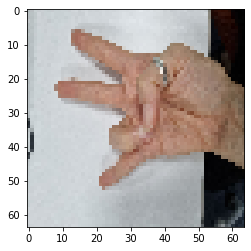

In [64]:
import keras
import glob
import matplotlib.pyplot as plt


tmp = glob.glob(".\\test\\7.jpg")

img = keras.preprocessing.image.load_img(tmp[0], target_size=(64,64))
plt.imshow(img)

img_array = keras.preprocessing.image.img_to_array(img)
print(np.shape(img_array))

img_array = tf.expand_dims(img_array, 0) # Create a batch
print(np.shape(img_array))

predictions = model_num_adam.predict(img_array)

score = tf.nn.softmax(predictions[0])
score


print("(model_num_adam), true :{}, prediction :{} , percent :{:.2f}".format(7, class_names[np.argmax(score)], 100 * np.max(score)))




In [54]:
tmp

['.\\test\\7.jpg']

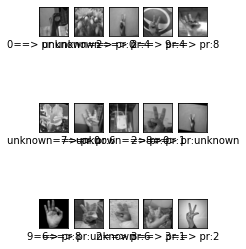

In [42]:
import pandas as pd
df = pd.DataFrame({'test':test_all_label,'result':result, 'bigo':test_all_label==result})
df['bigo'] = df['test'] == df['result']
findRow = df[df['bigo']==False].index

plt.figure(figsize=(3,5))
for cnt,i in enumerate(findRow[:15]):
    plt.subplot(,5,cnt+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_all_image[i].astype('uint8'), cmap=plt.cm.binary)
    # 원래 라벨 ==> 예측값
    plt.xlabel(class_names[test_all_label[i]]+'==> pr:'+class_names[df.iloc[i,1]])
plt.show()

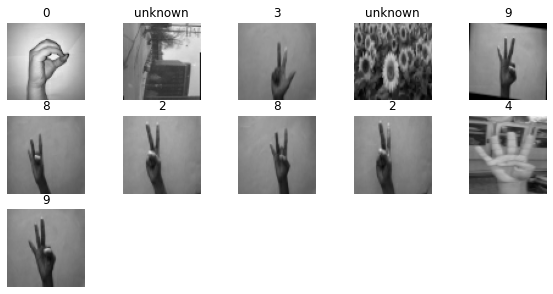

In [224]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(6,5 , i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TypeError: Cannot convert '' to EagerTensor of dtype int32

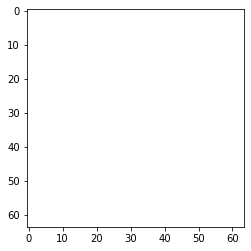

In [252]:
image, label = next(iter(train_ds))
_ = plt.imshow(image[0])
_ = plt.title(label)

def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label

NameError: name 'plot' is not defined

In [92]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/model_num_adam.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

model_num_adam.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 참고: gpu사용
with tf.device('/device:GPU:0'):

    epochs=15
    history_num_adam = model_num_adam.fit(train_ds, epochs=epochs,
                   validation_steps=2,validation_data=(val_ds),
                   verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/15


ValueError: in user code:

    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\functional.py:415 call
        inputs, training=training, mask=mask)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense_9 is incompatible with the layer: expected axis -1 of input shape to have value 512 but received input with shape (None, 2, 2, 11)


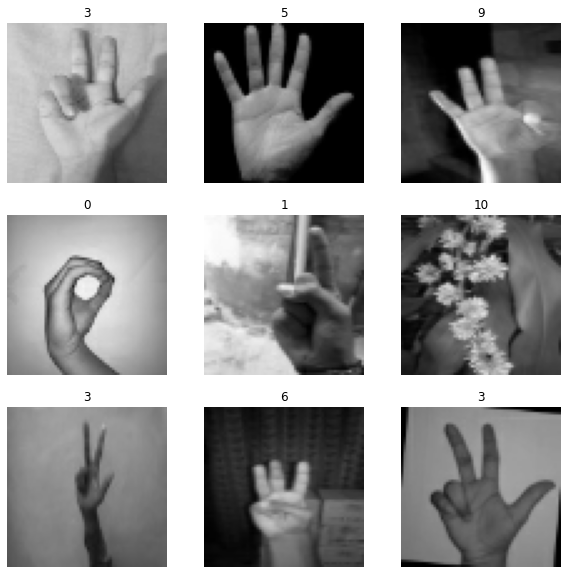

In [47]:
import matplotlib.pyplot as plt

# figure 크기를 조절합니다.
plt.figure(figsize=(10, 10))

# 배치 하나를 가져옵니다.
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [50]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

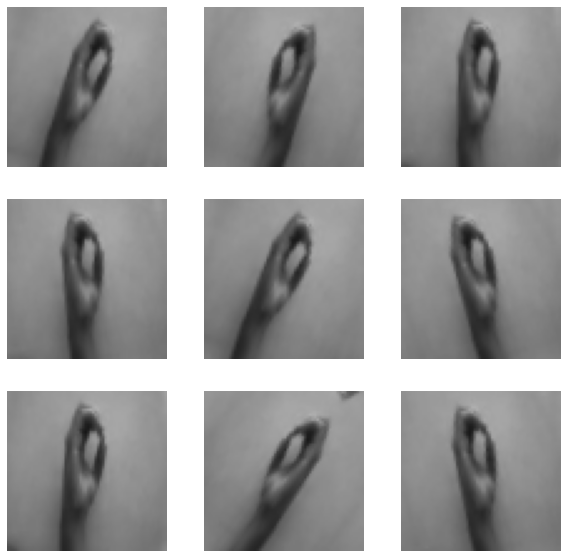

In [52]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [70]:
inputs = tf.keras.Input(shape=(64,64,3))
x = data_augmentation(inputs)
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(x)

In [75]:
from tensorflow.keras.models import load_model
model_num_adam = load_model('.\\data\model\\model_VGG16_adam_best.hdf5')
model_num_SGD = load_model('.\\data\model\\model_VGG16_SGD_best.hdf5')

In [76]:
model_num_SGD.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 29)                14877     
Total params: 14,729,565
Trainable params: 14,877
Non-trainable params: 14,714,688
_________________________________________________________________


In [77]:
model_num_adam.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 29)                14877     
Total params: 14,729,565
Trainable params: 14,877
Non-trainable params: 14,714,688
_________________________________________________________________


In [56]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [78]:
prediction_layer = tf.keras.layers.Dense(len(class_names), activation ='softmax')

In [79]:

model_num_adam = tf.keras.Sequential([
    inputs,
    model_num_adam,
    prediction_layer])   


model_num_SGD = tf.keras.Sequential([
    inputs,
    model_num_adam,
    prediction_layer])

ValueError: Dimensions must be equal, but are 11 and 29 for '{{node dense_7/MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false](Placeholder, dense_7/MatMul/ReadVariableOp)' with input shapes: [?,11], [29,11].

In [36]:
model_num_SGD.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/model_num_adam.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

model_num_adam.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 참고: gpu사용
with tf.device('/device:GPU:0'):

    epochs=20
    history_num_adam = model_num_adam.fit(train_ds, epochs=epochs,
                   validation_steps=2,validation_data=(val_ds),
                   verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/20


ValueError: in user code:

    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\sequential.py:383 call
        outputs = layer(inputs, **kwargs)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\engine\input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense_2 is incompatible with the layer: expected axis -1 of input shape to have value 29 but received input with shape (None, 11)


<Figure size 864x288 with 0 Axes>

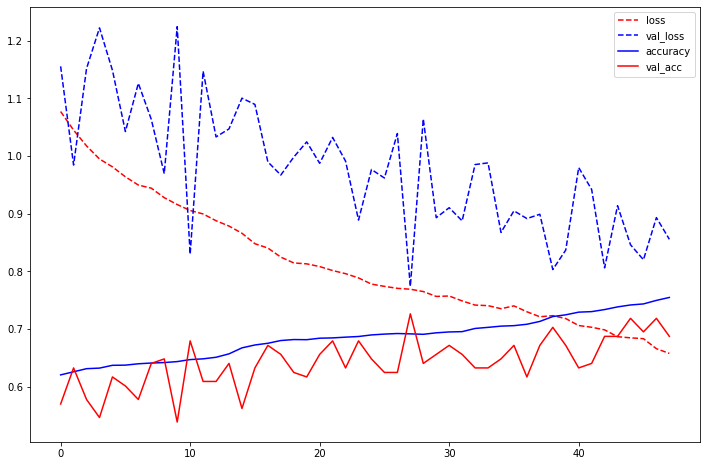

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.figure(figsize=(12,8))
plt.plot(history_num_adam.history['loss'],'--',c='red')
plt.plot(history_num_adam.history['val_loss'],'--',c='blue')
plt.plot(history_num_adam.history['accuracy'],c='blue')
plt.plot(history_num_adam.history['val_accuracy'],c='red')
plt.legend(['loss','val_loss', 'accuracy','val_acc'])
plt.show()

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/model_num_SGD.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

model_num_SGD.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 참고: gpu사용
with tf.device('/device:GPU:0'):

    epochs=20
    history_num_SGD = model_num_SGD.fit(train_ds, epochs=epochs,
                   validation_steps=2,validation_data=(val_ds),
                   verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/50
207/207 [==============================] - 5s 23ms/step - loss: 2.3910 - accuracy: 0.1454 - val_loss: 2.3788 - val_accuracy: 0.2500
Epoch 2/50
207/207 [==============================] - 5s 23ms/step - loss: 2.3611 - accuracy: 0.3205 - val_loss: 2.3287 - val_accuracy: 0.3828
Epoch 3/50
207/207 [==============================] - 5s 22ms/step - loss: 2.3042 - accuracy: 0.3723 - val_loss: 2.2611 - val_accuracy: 0.3828
Epoch 4/50
207/207 [==============================] - 5s 23ms/step - loss: 2.2081 - accuracy: 0.3873 - val_loss: 2.1232 - val_accuracy: 0.3828
Epoch 5/50
207/207 [==============================] - 5s 23ms/step - loss: 2.0716 - accuracy: 0.4052 - val_loss: 1.9765 - val_accuracy: 0.3828
Epoch 6/50
207/207 [==============================] - 5s 23ms/step - loss: 1.9345 - accuracy: 0.4151 - val_loss: 1.8994 - val_accuracy: 0.4375
Epoch 7/50
207/207 [==============================] - 5s 23ms/step - loss: 1.8261 - accuracy: 0.4248 - val_loss: 1.7951 - val_accuracy: 0.4297

<Figure size 864x288 with 0 Axes>

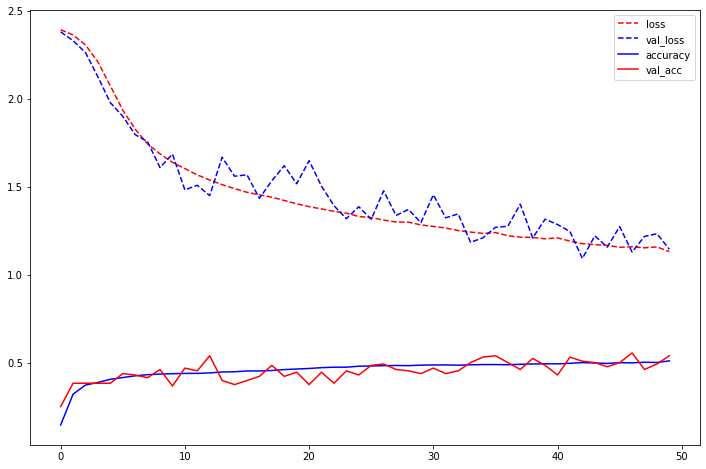

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.figure(figsize=(12,8))
plt.plot(history_num_SGD.history['loss'],'--',c='red')
plt.plot(history_num_SGD.history['val_loss'],'--',c='blue')
plt.plot(history_num_SGD.history['accuracy'],c='blue')
plt.plot(history_num_SGD.history['val_accuracy'],c='red')
plt.legend(['loss','val_loss', 'accuracy','val_acc'])
plt.show()

In [52]:
model_num_adam.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 29)                14729565  
_________________________________________________________________
dense_12 (Dense)             (None, 11)                330       
Total params: 14,729,895
Trainable params: 15,207
Non-trainable params: 14,714,688
_________________________________________________________________


In [53]:
img_shape = (64,64, 3)

# include_top = False인 경우 input_shape = img_size 지정 필요
base_model = tf.keras.applications.VGG16(input_shape = img_shape,
                                         include_top = False,
                                         weights = 'imagenet')

base_model.trainable=False
# flatten이 없음 ( globalaveragepooling으로 대체 ) #  ==> 가중치가 필요없음
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()   

# FFNN의 가중치는 학습됨
prediction_layer = tf.keras.layers.Dense(len(class_names), activation ='softmax')


# model : vgg16이 갖고있는 가중치 + FFNN 가중치로 학습
base_model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [54]:
base_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 11)                5643      
Total params: 14,720,331
Trainable params: 5,643
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
small_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=img_shape), # 784+1
    tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(len(class_names))
])
    
small_model.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/small_model.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)



with tf.device('/device:GPU:0'):
    epochs=20
    small_model = small_model.fit(train_ds, epochs=epochs,
                   validation_steps=2,validation_data=(val_ds),
                   verbose=1, callbacks=[early_stopping_callback,checkpointer])


---------------과적합 방지를 위해 small모델 제작

In [32]:
# img_shape = (64,64, 3)

# # include_top = False인 경우 input_shape = img_size 지정 필요
# VGG16_MODEL = tf.keras.applications.VGG16(input_shape = img_shape,
#                                          include_top = False,
#                                          weights = 'imagenet')

# VGG16_MODEL.trainable=False 

# # flatten이 없음 ( globalaveragepooling으로 대체 ) #  ==> 가중치가 필요없음
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()   

# # FFNN의 가중치는 학습됨
# prediction_layer = tf.keras.layers.Dense(len(class_names), activation ='softmax')

# # model : vgg16이 갖고있는 가중치 + FFNN 가중치로 학습
# model_num_VGG16_adam = tf.keras.Sequential([
#     VGG16_MODEL,
#     global_average_layer,
#     prediction_layer
# ])

# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# # 학습이 언제 자동 중단 될지를 설정합니다.
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# #최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
# modelpath="./data/model/model_VGG16_adam_best.hdf5"

# # 최적화 모델을 업데이트하고 저장합니다.
# checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# model_num_VGG16_adam.compile(optimizer = 'adam',
#              loss = 'sparse_categorical_crossentropy',
#              metrics=['accuracy'])

# # 참고: gpu사용
# with tf.device('/device:GPU:0'):

#     epochs=15
#     history_num_VGG16_adam = model_num_VGG16_adam.fit(train_ds, epochs=epochs,
#                    validation_steps=2,validation_data=(val_ds),
#                    verbose=1, callbacks=[early_stopping_callback,checkpointer])

---------------test

In [11]:
test_all_label=[]; test_all_image=[]
for test_img, test_label in val_ds:
    test_all_label.extend(test_label.numpy())
    test_all_image.extend(test_img.numpy())
np.shape(test_all_label), np.shape(test_all_image)

((3300,), (3300, 64, 64, 3))

In [12]:
model_num_adam.predict(test_all_image[0].reshape(1,64,64,3),test_all_label[0])

array([[1.0195400e-04, 5.8319588e-04, 3.1850813e-03, 2.7245653e-03,
        1.9373445e-02, 1.7949594e-04, 8.3714932e-01, 8.4424242e-03,
        1.2568417e-01, 1.3978332e-03, 1.1785061e-03]], dtype=float32)

In [13]:
from tqdm import tqdm
result=[]
with tf.device('/device:GPU:0'):
    for img in tqdm(test_all_image):
        softmax=model_num_adam.predict(img.reshape(1,64,64,3))
        result.append(np.argmax(softmax))

100%|██████████████████████████████████████████████████████████████████████████████| 3300/3300 [02:08<00:00, 25.63it/s]


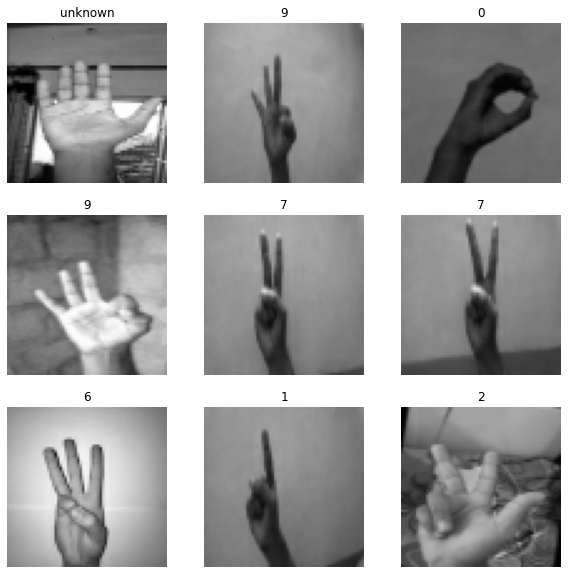

In [119]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(test_all_image[i].astype("uint8"))
  plt.title(class_names[result[i]])
  plt.axis("off")

In [120]:
model_num_adam.evaluate(val_ds)

52/52 [==============================] - 3s 60ms/step - loss: 1.1303 - accuracy: 0.6258


[1.1303184032440186, 0.6257575750350952]

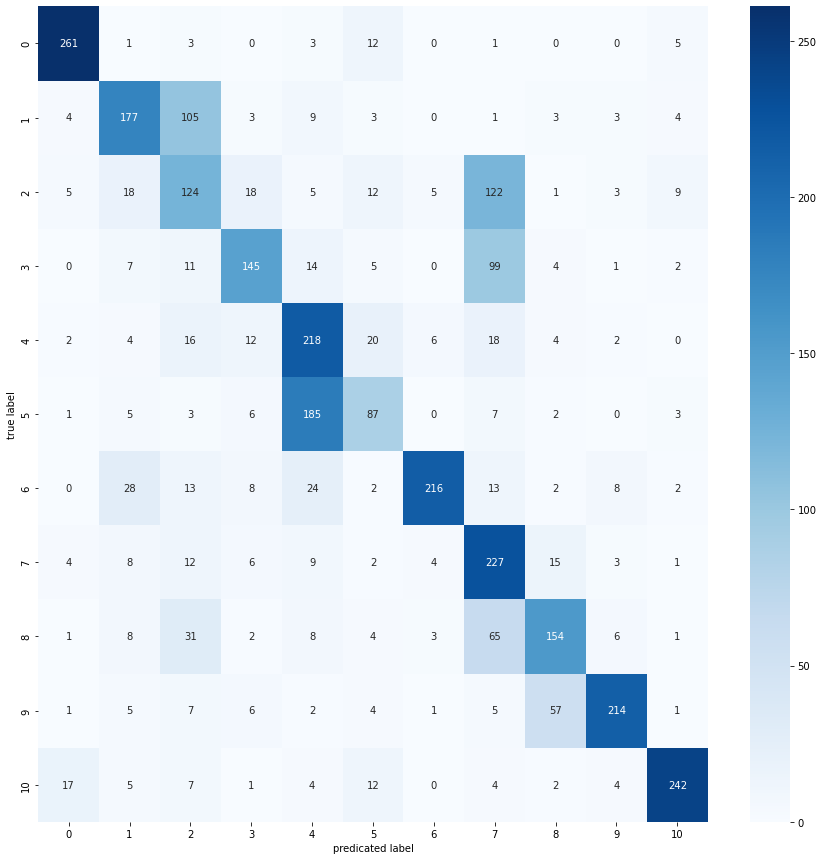

In [121]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


#혼돈행렬만들기
plt.figure(figsize=(15,15))
cm=confusion_matrix(test_all_label, result)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('predicated label')
plt.ylabel('true label')
plt.show()

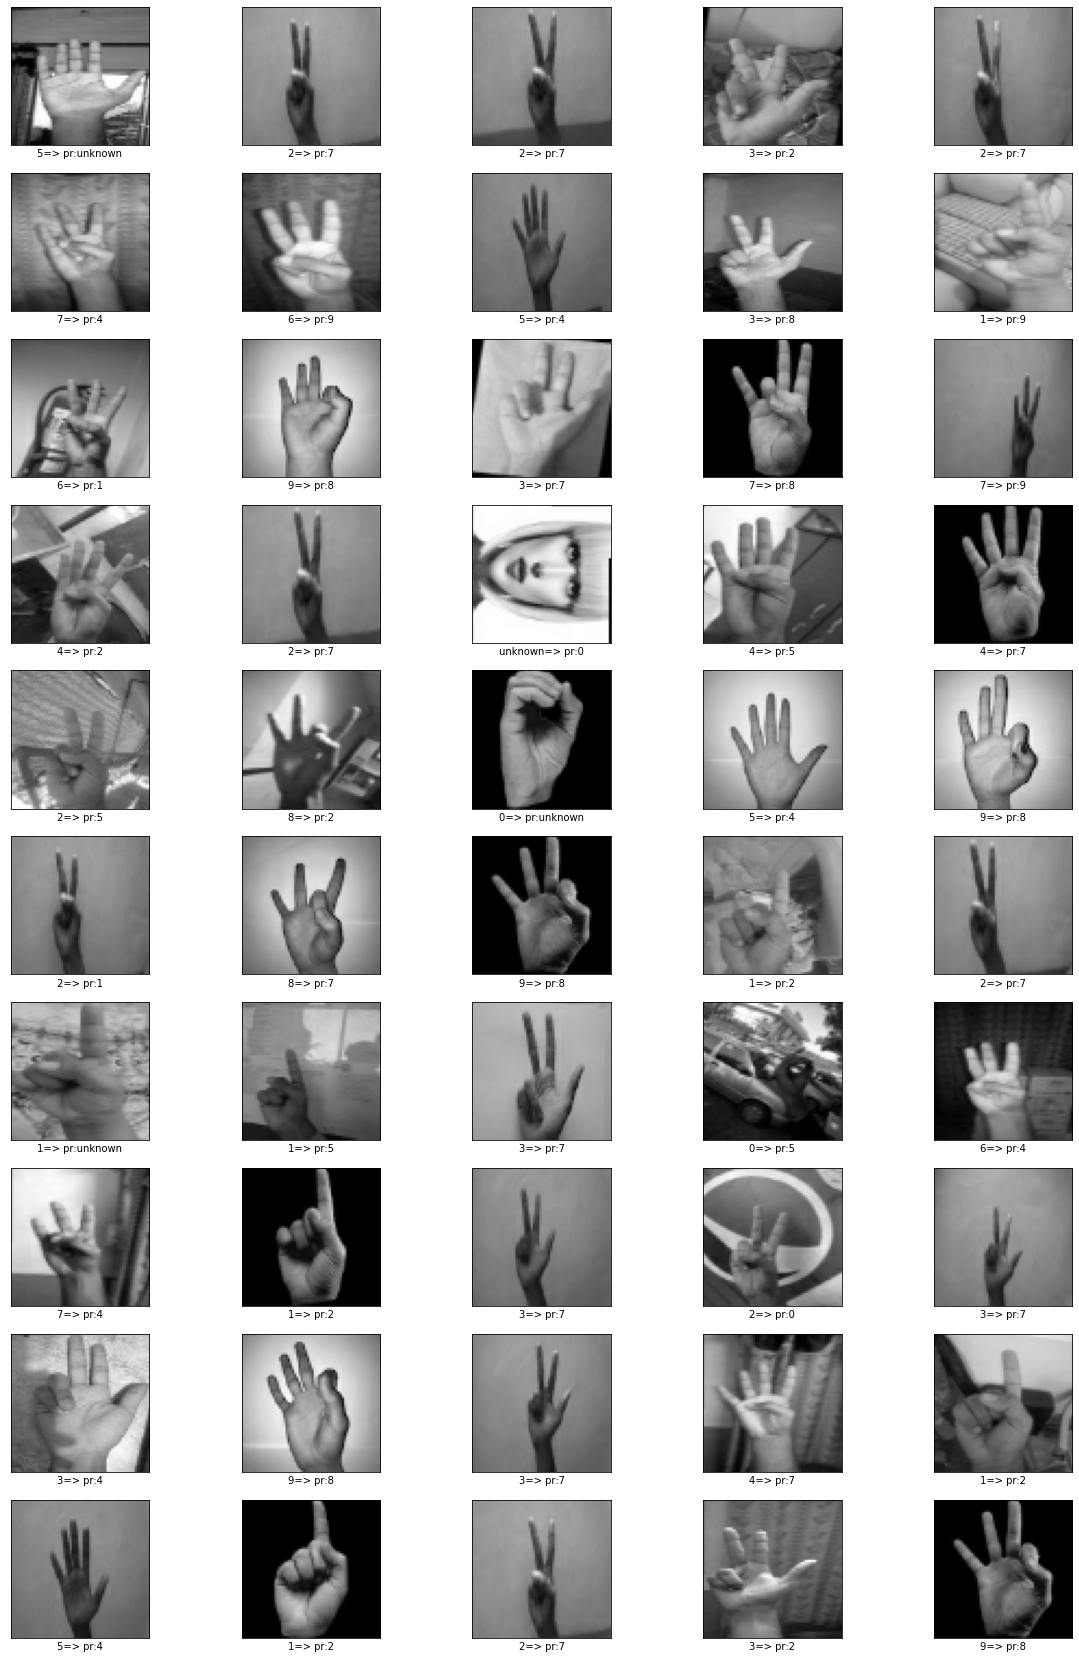

In [138]:
import pandas as pd

df = pd.DataFrame({'test':test_all_label,'result':result})
df['bigo'] = df['test'] == df['result']
findRow = df[df['bigo']==False].index

plt.figure(figsize=(20,30))
for cnt,i in enumerate(findRow[:50]):
    plt.subplot(10,5,cnt+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow((test_all_image[i]).astype('uint8'), cmap=plt.cm.binary)
    # 원래 라벨 ==> 예측값
    plt.xlabel(class_names[test_all_label[i]]+'=> pr:'+class_names[df.iloc[i,1]])
plt.show()




0 class error List
(array([ 1,  2,  4,  5,  7, 10], dtype=int64), array([ 1,  3,  3, 12,  1,  5], dtype=int64))


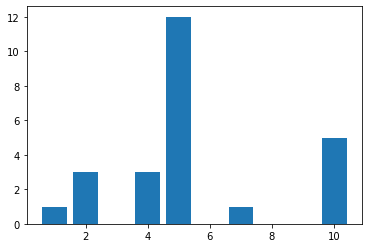

1 class error List
(array([ 0,  2,  3,  4,  5,  7,  8,  9, 10], dtype=int64), array([  4, 105,   3,   9,   3,   1,   3,   3,   4], dtype=int64))


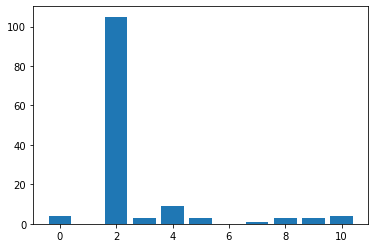

2 class error List
(array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64), array([  5,  18,  18,   5,  12,   5, 122,   1,   3,   9], dtype=int64))


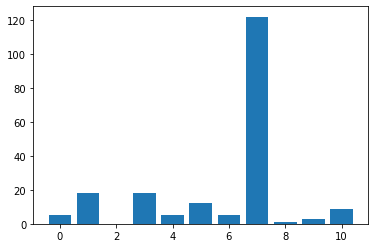

3 class error List
(array([ 1,  2,  4,  5,  7,  8,  9, 10], dtype=int64), array([ 7, 11, 14,  5, 99,  4,  1,  2], dtype=int64))


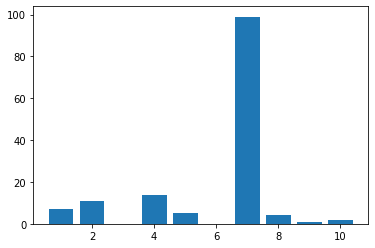

4 class error List
(array([0, 1, 2, 3, 5, 6, 7, 8, 9], dtype=int64), array([ 2,  4, 16, 12, 20,  6, 18,  4,  2], dtype=int64))


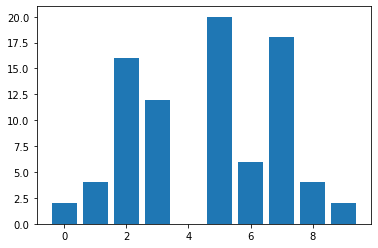

5 class error List
(array([ 0,  1,  2,  3,  4,  7,  8, 10], dtype=int64), array([  1,   5,   3,   6, 185,   7,   2,   3], dtype=int64))


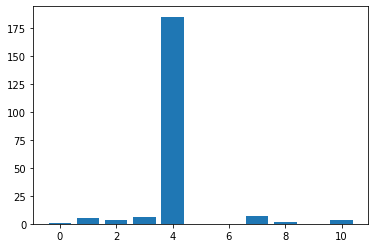

6 class error List
(array([ 1,  2,  3,  4,  5,  7,  8,  9, 10], dtype=int64), array([28, 13,  8, 24,  2, 13,  2,  8,  2], dtype=int64))


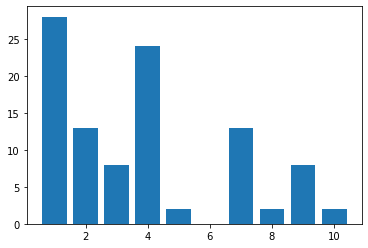

7 class error List
(array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10], dtype=int64), array([ 4,  8, 12,  6,  9,  2,  4, 15,  3,  1], dtype=int64))


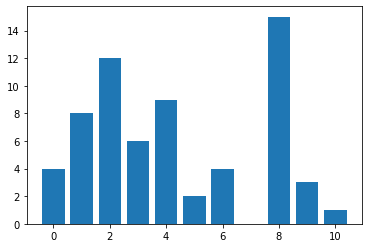

8 class error List
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10], dtype=int64), array([ 1,  8, 31,  2,  8,  4,  3, 65,  6,  1], dtype=int64))


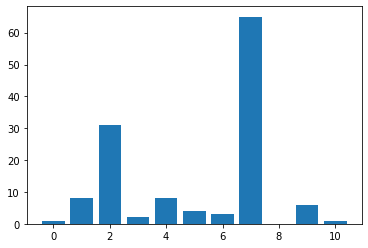

9 class error List
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10], dtype=int64), array([ 1,  5,  7,  6,  2,  4,  1,  5, 57,  1], dtype=int64))


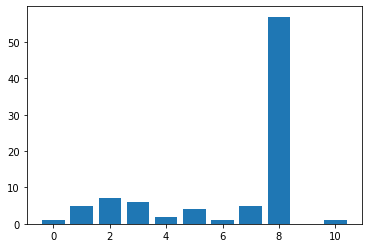

10 class error List
(array([0, 1, 2, 3, 4, 5, 7, 8, 9], dtype=int64), array([17,  5,  7,  1,  4, 12,  4,  2,  4], dtype=int64))


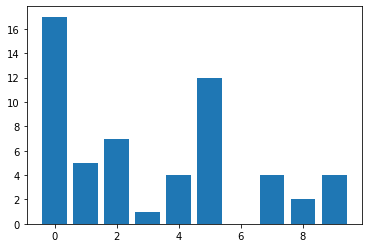

11 class error List
(array([], dtype=int64), array([], dtype=int64))


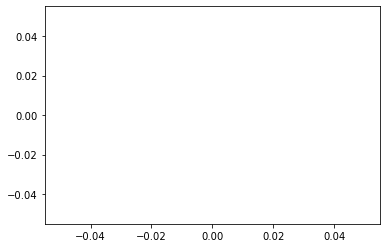

In [139]:

# False들만
errDf = df.iloc[findRow,:]

for x in range(12):
    print(str(x) + ' class error List')
    tmp = errDf[errDf['test']==x]
    tmpU = np.unique(tmp['result'],return_counts=True)
    print(tmpU)
    # 몇번라벨, 카운트수
    plt.bar(tmpU[0], tmpU[1])
    plt.show()

In [ ]:
model_num_SGD

In [140]:
model_num_SGD = tf.keras.Sequential([
    model_num_SGD,
    prediction_layer
])   

In [141]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath3="./data/model/model_num_SGD.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath3, monitor='val_loss', verbose=0, save_best_only=True)

model_num_SGD.compile(optimizer = 'SGD',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 참고: gpu사용
with tf.device('/device:GPU:0'):

    epochs=15
    history_num_SGD = model_num_SGD.fit(train_ds, epochs=epochs,
                   validation_steps=2,validation_data=(val_ds),
                   verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/15
207/207 [==============================] - 6s 27ms/step - loss: 2.0619 - accuracy: 0.3086 - val_loss: 1.9290 - val_accuracy: 0.3281
Epoch 2/15
207/207 [==============================] - 5s 25ms/step - loss: 1.6956 - accuracy: 0.4411 - val_loss: 1.6510 - val_accuracy: 0.4609
Epoch 3/15
207/207 [==============================] - 5s 25ms/step - loss: 1.5614 - accuracy: 0.5033 - val_loss: 1.4980 - val_accuracy: 0.4844
Epoch 4/15
207/207 [==============================] - 6s 26ms/step - loss: 1.4802 - accuracy: 0.5345 - val_loss: 1.5356 - val_accuracy: 0.5000
Epoch 5/15
207/207 [==============================] - 6s 26ms/step - loss: 1.4233 - accuracy: 0.5620 - val_loss: 1.3402 - val_accuracy: 0.5625
Epoch 6/15
207/207 [==============================] - 5s 26ms/step - loss: 1.3681 - accuracy: 0.5837 - val_loss: 1.3024 - val_accuracy: 0.5703
Epoch 7/15
207/207 [==============================] - 5s 25ms/step - loss: 1.3236 - accuracy: 0.5970 - val_loss: 1.4009 - val_accuracy: 0.5625